<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0507_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_gpu==2.0

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 3.8MB 47.4MB/s 
     |████████████████████████████████| 450kB 48.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=10616f4d78cd6d73f021132b6b3787962c8c9301619c27341fd8f1296688cc88
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Unins

In [2]:
pip install keras==2.3.1

## 2020 0507 목
## 3.6 주택 가격 예측 :회귀 문제
### 3.6.1 보스턴 주택 가격 데이터셋
* 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값ㅇ르 예측

#### 3-24 보스턴 주택 데이터셋 로드하기

In [6]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [9]:
print (train_data.shape)
print (test_data.shape)
# 가격은 일반적으로 1만 달러 ~ 5만 달러 사이 
print (train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

### 3.6.2 데이터 준비
#### 3-25 데이터 정규화하기
* 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다.
* 이런 데이터를 다룰 때 대표적인 방법으로는 특성별로 정규화를 하는 것이다.

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 3.6.3 모델 구성
#### 3-26 모델 정의하기
* 샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용
* 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나서 작은 모델로 과대적합을 피할 수 있다.

In [0]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# 위의 코드의 마지막 층은 하나의 유닛을 가지고 활성화 함수가 없다.(선형 층이라고 부름)
# 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)

### 3.6.4 K-겹 검증을 사용한 훈련 검증
#### 3-27 K-겹 검증하기
* 검증 세트가 매우 작기 때문에 일반적으로 학습을 하면 신뢰 있는 모델 평가를 할 수 없다.
* K-겹 교차 검증을 해서 모델 검증 점수는 K개의 검증 정수 평균이 된다.

In [19]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores =[]

for i in range(k):
    print ('처리중인 폴드 # ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # np.concatenate 는 배열 결합 즉 val_data 말고 나머지 데이터 결합
    partial_train_data = np.concatenate( # 훈련 데이터 준비 : 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
         axis=0)
    
    partial_train_targets = np.concatenate( 
         [train_targets[:i * num_val_samples],
          train_targets[(i + 1) * num_val_samples :]],
          axis=0)       
    
    model = build_model() # 케라스 모델 구성 (컴파일 포함)
    model.fit(partial_train_data, partial_train_targets, 
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 #  0
처리중인 폴드 #  1
처리중인 폴드 #  2
처리중인 폴드 #  3


In [20]:
print (all_scores)
print (np.mean(all_scores))

[2.1293928623199463, 2.9860172271728516, 2.5395255088806152, 2.3491947650909424]
2.501032590866089


#### 3-28 각 폴드에서 검증 점수를 로그에 저장하기.

In [24]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print ('처리중인 폴드 # ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # np.concatenate 는 배열 결합 즉 val_data 말고 나머지 데이터 결합
    partial_train_data = np.concatenate( # 훈련 데이터 준비 : 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
         axis=0)
    
    partial_train_targets = np.concatenate( 
         [train_targets[:i * num_val_samples],
          train_targets[(i + 1) * num_val_samples :]],
          axis=0)    
     
    model = build_model() # 케라스 모델 구성 (컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets, 
              validation_data = (val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)  

처리중인 폴드 #  0
처리중인 폴드 #  1
처리중인 폴드 #  2
처리중인 폴드 #  3


#### 3-29 K-겹 검증 점수 평균을 기록하기

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [30]:
print (len(average_mae_history))

500


#### 3-30 검증 점수 그래프
* 이 그래프는 범위가 크고 변동이 심해서 보기가 조금 어렵다.
* 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킨다.
* 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균(exponenital moving average_로 대체

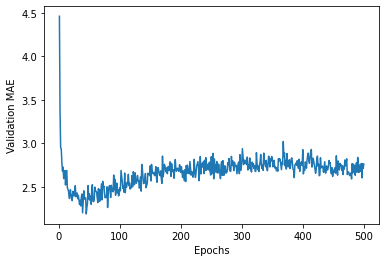

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### 3-31 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

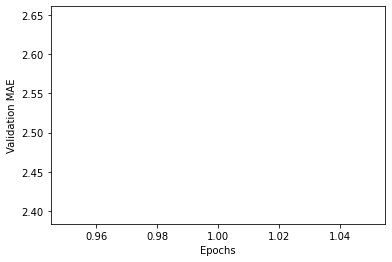

In [36]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
        return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

위 그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추었다. 이 지점 이후로는 과대적합이 시작된다.

#### 3-32 최종 모델 훈련하기

In [40]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 291us/step - loss: 480.4551 - mae: 19.9066
Epoch 2/80
404/404 [==============================] - 0s 153us/step - loss: 292.7290 - mae: 14.7962
Epoch 3/80
404/404 [==============================] - 0s 167us/step - loss: 140.9300 - mae: 9.2026
Epoch 4/80
404/404 [==============================] - 0s 172us/step - loss: 75.5403 - mae: 6.5043
Epoch 5/80
404/404 [==============================] - 0s 143us/step - loss: 48.8347 - mae: 5.1325
Epoch 6/80
404/404 [==============================] - 0s 177us/step - loss: 35.8190 - mae: 4.2686
Epoch 7/80
404/404 [==============================] - 0s 165us/step - loss: 28.6936 - mae: 3.7431
Epoch 8/80
404/404 [==============================] - 0s 175us/step - loss: 24.5046 - mae: 3.4857
Epoch 9/80
404/404 [==============================] - 0s 145us/step - loss: 21.8301 - mae: 3.2204
Epoch 10/80
404/404 [==============================] - 0s 147us/step - loss: 19.0883 - mae: 3.0662
Epoch 11/80
40

In [41]:
test_mae_score

2091.184814453125

### 3.6.5 정리
* 회귀는 분류에서 사용했던 것과는 다른 손실 함수 사용 => 평균 제곱 오차(MSE) 는 회귀에서 자주 사용하는 손실 함수
* 회귀에서 사용하는 평가 지표는 분류와 다르다. 당연히 정확도 개념은 회귀에 적용 X, 일반적인 회귀 지표는 평균 절대 오차(MAE)이다.
* 입력 데이터 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일을 조정해야한다.
* 가용한 데이터가 작다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법
* 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋다.(일반적으로 1개 또는 2개)

### 3.7 요약
* 벡더 데이터를 사용한 가장 일반적인 머신 러닝인 이진 분류, 다중 분류, 스칼라 회귀 작업을 다룸
* 보통 원본 데이터를 신경망에 주입하기 전에 전처리해야함!
* 데이터 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정을 해야한다.
* 훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 데이터에 대해 나쁜 결과를 얻게 된다.
* 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개 은닉 층을 가진 신경망을 사용한다.
* 데이터가 많은 범주로 나뉘어 있을 때 중간측이 너무 작으면 정보의 병목이 생길 수 있다.
* 회귀는 분류와 다른 손실 함수와 평가 지표를 사용한다.
* 적은 데이터를 사용할 때는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와준다.